In [ ]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
'''
@文件        :017.Trans2Dff.ipynb
@说明        :
@时间        :2023/07/27 12:26:21
@作者        :Wu Baosheng
@版本        :1.0
'''

In [1]:
import os,re,sys
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib as mpl
import tspex
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
os.chdir('H:/002.singcell/01.liver/10.mutileSpecies/05.SAMap/03.endothelial/02.knockout/02.Trans')

In [15]:
def make_index_unique(index: pd.Index, join: str = "-"):
    ##### exsample df_lungfish.index=make_index_unique(df_lungfish.index)
    """
    Makes the index unique by appending a number string to each duplicate index element:
    '1', '2', etc.

    If a tentative name created by the algorithm already exists in the index, it tries
    the next integer in the sequence.

    The first occurrence of a non-unique value is ignored.

    Parameters
    ----------
    join
         The connecting string between name and integer.

    Examples
    --------
    # >>> from anndata import AnnData
    # >>> adata = AnnData(np.ones((2, 3)), var=pd.DataFrame(index=["a", "a", "b"]))
    # >>> adata.var_names
    # Index(['a', 'a', 'b'], dtype='object')
    # >>> adata.var_names_make_unique()
    # >>> adata.var_names
    Index(['a', 'a-1', 'b'], dtype='object')
    """
    import warnings
    if index.is_unique:
        return index
    from collections import Counter

    values = index.values.copy()
    indices_dup = index.duplicated(keep="first")
    values_dup = values[indices_dup]
    values_set = set(values)
    counter = Counter()
    issue_interpretation_warning = False
    example_colliding_values = []
    for i, v in enumerate(values_dup):
        while True:
            counter[v] += 1
            tentative_new_name = v + join + str(counter[v])
            if tentative_new_name not in values_set:
                values_set.add(tentative_new_name)
                values_dup[i] = tentative_new_name
                break
            issue_interpretation_warning = True
            if len(example_colliding_values) < 5:
                example_colliding_values.append(tentative_new_name)

    if issue_interpretation_warning:
        warnings.warn(
            f"Suffix used ({join}[0-9]+) to deduplicate index values may make index "
            + "values difficult to interpret. There values with a similar suffixes in "
            + "the index. Consider using a different delimiter by passing "
            + "`join={delimiter}`"
            + "Example key collisions generated by the make_index_unique algorithm: "
            + str(example_colliding_values)
        )
    values[indices_dup] = values_dup
    index = pd.Index(values, name=index.name)
    return index
"""
usage: df.index=make_index_unique(df.index)
"""

'\nusage: df.index=make_index_unique(df.index)\n'

In [11]:
df = pd.read_csv('./mouse.count',sep='\t',index_col=0,header=0)
df.index=df.index.str.upper()

In [16]:
df.index=make_index_unique(df.index)

In [23]:
wild = ['NC12_0','NC4_0','NC5_0']
kdr = ['KDR2_0','KDR3_0','KDR4_0']
flt4 = ['Flt1_0','Flt2_0']
sample = wild+kdr

In [19]:

df[sample].to_csv('./wild_vs_flt4.count',sep='\t',index=True,header=True)

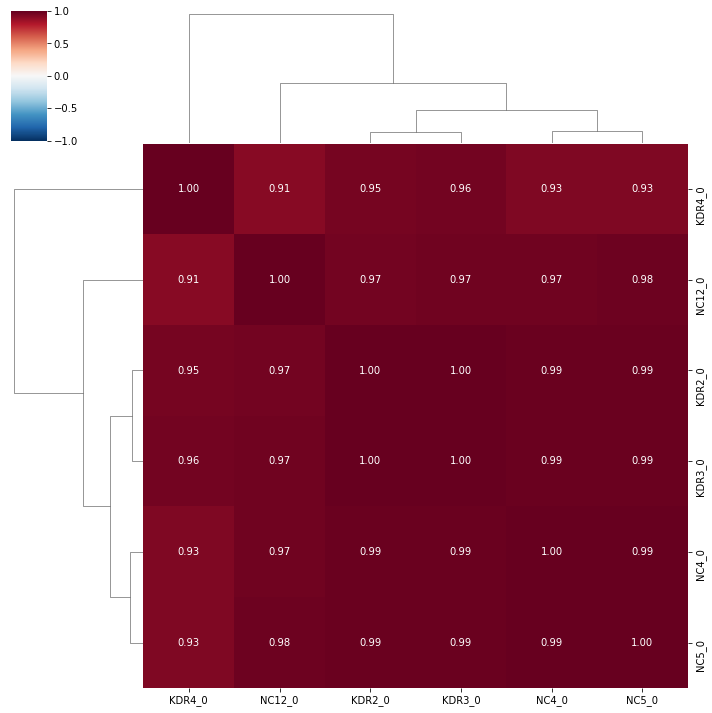

In [24]:
import seaborn as sns
sns.clustermap(df[sample].corr(),cmap='RdBu_r',vmin=-1,vmax=1,center=0,annot=True,fmt='.2f',square=True)

In [27]:
kdr = pd.read_csv('./kdr_wild_all_genes_DESeq2.txt',sep='\t',index_col=0,header=0)
flt4 = pd.read_csv('./flt4_wild_all_genes_DESeq2.txt',sep='\t',index_col=0,header=0)

In [37]:
kdr = kdr[kdr['padj']<0.05]
flt4 = flt4[flt4['padj']<0.05]

In [ ]:
n=0
for i in kdr[kdr['log2FoldChange']>1].index.to_list():
    n+=1
    print(i)
print(n)
